In [0]:
import numpy as np
import math
from numpy.random import randn
import time
import copy

robot_length = 90
robot_radius = 25
map_length = 750
map_width = 500
global robot_length, robot_radius, map_length, map_width


class State:
  """We create an object called State which has x coordinate , 
  y coordinate, angle with respect to magnetic north, and angular velocity"""
  def __init__(self, x, y, angle, omega):
      self.x = x
      self.y = y
      self.angle = np.radians(angle)
      self.omega = omega
      self.time = 0
  
  def print_state(self):
      print("X is: " + str(self.x))
      print("Y is: " + str(self.y))
      degrees = np.degrees(self.angle)
      print("Angle is: " + str(degrees))
      print("Omega is:" + str(self.omega))
      print("Time: " + str(self.time))

class wheel_angular_velocity:
  """class that has the angular velocity left and angular velocity right"""
  def __init__(self, w_l, w_r):
    self.w_l = w_l
    self.w_r = w_r

def return_velocities(angular_velocity):
  v_r = angular_velocity.w_r * robot_radius
  v_l = angular_velocity.w_l * robot_radius
  v_robot = (v_r + v_l) / 2
  omega_robot = (v_r - v_l) / (robot_length)
  return v_robot, omega_robot

def update_state(my_State, dt, my_wheel_angular_velocity):
  """given current state and input returns the next state"""
  angle = normalize_theta(my_State.angle)
  next_State = State(my_State.x, my_State.y, np.degrees(angle), my_State.omega)
  V_wheel_left  = my_wheel_angular_velocity.w_l * robot_radius
  V_wheel_right = my_wheel_angular_velocity.w_r * robot_radius
  #linear velocity and displacement
  v_robot = (V_wheel_left + V_wheel_right) / 2
  d_s = v_robot * dt
  
  #angular velocity and displacement
  omega_robot = (V_wheel_right - V_wheel_left) / (robot_length)
  d_theta = omega_robot * dt
  angle = normalize_theta(next_State.angle + d_theta/2)
  dx_robot = d_s * np.cos(angle)
  dy_robot = d_s * np.sin(angle)
  next_State.x = next_State.x + dx_robot
  next_State.y = next_State.y + dy_robot
  next_State.angle = angle
  next_State.omega = omega_robot
  return next_State

def normalize_theta(theta):
  theta = theta % (2 * np.pi )
  if theta >= np.pi:
    theta -= 2* np.pi 
  return theta

In [0]:
def sensor_output(my_State,map_length,map_width):
  my_State.angle = normalize_theta(my_State.angle)
  if my_State.angle == 0.0:
    return [map_length,my_State.y]
  elif my_State.angle == -np.pi/2:
    return [my_State.x,0]
  elif my_State.angle == np.pi/2:
    return [my_State.x,map_width]
  elif my_State.angle == np.pi:
    return [0,my_State.y]
  else:
    y_1 = (map_length - my_State.x)*np.tan(my_State.angle) + my_State.y
    x_1 = (map_width - my_State.y)/np.tan(my_State.angle) + my_State.x
    
    if (x_1 >= 0 and x_1 <= map_length):
        # laser reaches horizontal boundary
        return [x_1, map_width]
    else:
        # laser reaches vertical boundary
        return [map_length, y_1]


def reflection_point(my_State):
    new_State = copy.deepcopy(my_State)
    theta = normalize_theta(new_State.angle)
    x = new_State.x
    y = new_State.y
    L = map_length
    W = map_width
    print("The value of theta from reflection_point: " + str(theta))
    # Area 1 
    if (theta >= -np.pi and theta < -np.pi/2):
        if theta != -np.pi:
            boundary = [0, 0]
            point = sensor_output(new_State, boundary[0], boundary[1])
        else:
            point = [0, y]
    # Area 2
    if (theta >= -np.pi/2 and theta < 0.0):
        if theta != -np.pi/2:
            boundary = [L, 0]
            point = sensor_output(new_State, boundary[0], boundary[1])
        else:
            point = [x, 0]
    # Area 3
    if (theta >= 0.0 and theta < np.pi/2):
        if theta != 0.0:
            boundary = [L, W]
            point = sensor_output(new_State, boundary[0], boundary[1])
        else:
            point = [L, y]
    # Area 4
    if (theta >= np.pi/2 and theta < np.pi):
        if theta != np.pi/2:
            boundary = [0, W]
            point = sensor_output(new_State, boundary[0], boundary[1])
        else:
            point = [x, W]
    return point

def sensor_output_1(my_State,map_length,map_width):
  return reflection_point(my_State)

def sensor_output_2(my_State,map_length,map_width):
  #my_new_state = copy.deepcopy(my_State)
  #my_new_state.angle = normalize_theta(my_new_state.angle)
  #my_new_state.angle = my_new_state.angle - np.pi/2
  #return sensor_output_1(my_new_state,map_length,map_width)
  my_new_state = copy.deepcopy(my_State)
  my_new_state.angle = my_new_state.angle - np.pi/2
  return reflection_point(my_new_state)

In [1260]:
my_State = State(30,30,45,0)
my_State.print_state()
print(sensor_output_1(my_State,map_length,map_width))
print(sensor_output_2(my_State,map_length,map_width))

X is: 30
Y is: 30
Angle is: 45.0
Omega is:0
Time: 0
The value of theta from reflection_point: 0.7853981633974483
[500.00000000000006, 500]
The value of theta from reflection_point: -0.7853981633974483
[60.0, 0]


In [0]:
def Hx(my_State):
  x = my_State.x
  y = my_State.y
  theta = normalize_theta(my_State.angle)
  [x1, y1] = sensor_output_1(my_State,map_length,map_width) 
  [x2, y2] = sensor_output_2(my_State,map_length,map_width)
  front_distance = np.sqrt( (x - x1)**2 + (y - y1)**2 )
  right_distance = np.sqrt( (x - x2)**2 + (y - y2)**2 )
  return [front_distance,right_distance, theta]

In [1262]:
Hx(my_State)

The value of theta from reflection_point: 0.7853981633974483
The value of theta from reflection_point: -0.7853981633974483


[664.6803743153547, 42.42640687119285, 0.7853981633974483]

In [0]:
# NOISE
motor_rpm_max = 130 # Datasheet yields this
omega_max = 2*np.pi*motor_rpm_max/60.0 # max motor angular velocity
omega_std = omega_max*0.05 # std = 5% of max motor angular velocity 
range_std = 1200*0.03 # std of front and right distances using Laser
angle_std = np.radians(0.1) # std of IMU absolute bearing

In [0]:
# Including Noise
def noise_model(my_State, range_std, angle_std,omega_std, 
                my_wheel_angular_velocity, kalman_flag):
    """ Return the sensor output with simulated noisy"""
    [front_distance,right_distance, theta] = Hx(my_State)
    front_distance += np.random.normal(0, range_std) 
    right_distance += np.random.normal(0, range_std)
    w_noisy_l = my_wheel_angular_velocity.w_l + np.random.normal(0, omega_std)
    w_noisy_r = my_wheel_angular_velocity.w_r + np.random.normal(0, omega_std) 
    new_w = wheel_angular_velocity(w_noisy_l, w_noisy_r)
    #print("The angle is: " + str(my_State.angle+ randn() *  angle_std))
    if kalman_flag:
      theta += np.random.normal(0, angle_std)
      theta = normalize_theta(theta)
    new_State = State(my_State.x, my_State.y, np.degrees(theta), my_State.omega)
    return front_distance, right_distance, new_w, new_State
  


In [0]:
import pandas as pd
def simulate_path(my_State,dt,sim_time=1):
  t=0
  x_list = [my_State.x]
  y_list =[my_State.y]
  ang_list = [np.degrees(my_State.angle)]
  t_list = [0]
  new_State = copy.deepcopy(my_State)
  while t<= sim_time:
    new_State = update_state(new_State, dt, my_wheel_angular_velocity)
    x_list.append(new_State.x)
    y_list.append(new_State.y)
    ang_list.append(np.degrees(new_State.angle))
    t+=dt
    t_list.append(t)
  df = pd.DataFrame(data = {"time":t_list,"x":x_list,"y":y_list,"angle":ang_list})
  return df

def simulate_path_noise(my_State,dt,range_std,angle_std,omega_std,my_wheel_angular_velocity,sim_time=1,k_flag=False):
  t=0
  x_list = [my_State.x]
  y_list =[my_State.y]
  ang_list = [np.degrees(my_State.angle)]
  my_State.print_state()
  t_list = [0]
  front_list = [0]
  right_list = [0]

  new_State = copy.deepcopy(my_State)
  new_w = my_wheel_angular_velocity
  while t<= sim_time:
    front, right, new_w, new_State = noise_model(new_State, range_std, angle_std, omega_std, new_w, kalman_flag=k_flag)
    new_State.print_state() #should be same as my_State in x,y but different angle
    new_State = update_state(new_State, dt, new_w)
    new_State.print_state() #change in all x,y,angle
    x_list.append(new_State.x)
    y_list.append(new_State.y)
    ang_list.append(np.degrees(new_State.angle))
    front_list.append(front)
    right_list.append(right)
    t+=dt
    t_list.append(t)
  df = pd.DataFrame(data = {"time":t_list,"x":x_list,"y":y_list,"angle":ang_list})
  #print(df)
  return df

X is: 30
Y is: 30
Angle is: 45.0
Omega is:0
Time: 0
The value of theta from reflection_point: 0.7853981633974483
The value of theta from reflection_point: -0.7853981633974483
X is: 30
Y is: 30
Angle is: 45.0
Omega is:0
Time: 0
X is: 31.08591344057669
Y is: 31.084348597816316
Angle is: 44.95868753696697
Omega is:-0.14420770040694858
Time: 0
The value of theta from reflection_point: 0.7846771248954135
The value of theta from reflection_point: -0.7861192018994831
X is: 31.08591344057669
Y is: 31.084348597816316
Angle is: 44.95868753696697
Omega is:-0.14420770040694858
Time: 0
X is: 32.013138218352914
Y is: 32.012279468086454
Angle is: 45.02180739817502
Omega is:0.22032988029646075
Time: 0
The value of theta from reflection_point: 0.7857787742968958
The value of theta from reflection_point: -0.785017552498001
X is: 32.013138218352914
Y is: 32.012279468086454
Angle is: 45.02180739817502
Omega is:0.22032988029646075
Time: 0
X is: 33.0079396758889
Y is: 33.010106369216096
Angle is: 45.0869931

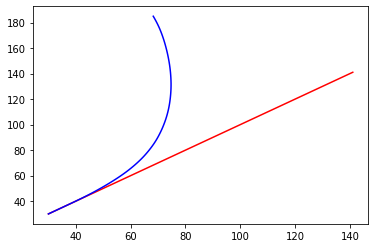

In [1266]:
# WITHOUT EKF TRAJECTORIES

#my_State = State(0,0,45,np.pi*2)
my_wheel_angular_velocity= wheel_angular_velocity(np.pi*2,np.pi*2)
dt =0.01

import matplotlib.pyplot as plt
df = simulate_path(my_State, dt)
df_noise = simulate_path_noise(my_State,dt,range_std, angle_std, omega_std, my_wheel_angular_velocity,sim_time=1)
plt.plot(df.x,df.y, color='r') #no noise
plt.plot(df_noise.x,df_noise.y, color='b') #kalman=False
#plt.plot(df_noise_True.x, df_noise_True.y, color='g') #kalman=True

In [0]:
class EKF:
  #Bar is for time prpagation update
  #Hat is for observation model
  def __init__(self, range_std, angle_std, omega_std, dt, sim_time, 
    init_State=State(30,30,45,0), init_w=wheel_angular_velocity(np.pi*2,np.pi*2)):
    self.state_bar = copy.deepcopy(init_State)
    self.state_hat = copy.deepcopy(init_State)
    self.state_truth = copy.deepcopy(init_State)
    #copy.deepcopy(init_State)
    self.F_t = np.eye(4)
    self.W_t = np.zeros((4,2))
    self.sigma_bar = np.eye(4)*0 #3X3 matrix
    self.sigma_hat = np.eye(4)*0 #3X3 matrix
    #self.Q = np.eye(2)
    self.Q = np.diag(np.array([0.01, 0.01]))
    self.R = np.diag(np.array([range_std, range_std, omega_std]))
    #self.R = np.eye(3)
    #self.R = np.diag(np.array([1, 1, 1]))
    self.k_gain = np.zeros((4,4))
    self.error = 0
    self.y_bar = np.zeros(3)
    self.H_t = np.zeros((3,4))
    self.w = init_w
    self.dt = dt
    self.v_robot, self.omega_robot = return_velocities(self.w)
    
  def time_update(self):
   #updates self.state_bar using self.state_hat from observation model
   theta_t_next = self.state_hat.angle + self.omega_robot * self.dt
   theta_t_next = normalize_theta(theta_t_next)
   print(theta_t_next)
   x_t_next = self.state_hat.x + (self.v_robot * np.cos(self.state_hat.angle) * self.dt)
   y_t_next = self.state_hat.y + (self.v_robot * np.sin(self.state_hat.angle) * self.dt)
   omega_t_next = self.state_hat.omega
   self.state_bar = State(x_t_next, y_t_next, np.degrees(theta_t_next), omega_t_next)
   #return state_bar 

  def time_linearize(self):
    #updates self.F_t, self.W_t
    self.F_t[1][0] = - self.v_robot * np.sin(self.state_hat.angle) * dt
    self.F_t[2][0] = self.v_robot * np.cos(self.state_hat.angle) * dt
    self.F_t[0][3] = dt
    self.W_t[0][0] =  dt
    self.W_t[1][1] = np.cos(self.state_hat.angle) * dt
    self.W_t[2][1] = np.sin(self.state_hat.angle) * dt
    self.W_t[3][0] = 1
    #return self.F_t, self.W_t

  def covariance_update(self):
    #updates self.sigma_bar from self.sigma_bar
    sigma_t_next_1 = np.matmul(np.matmul(self.F_t, self.sigma_hat), self.F_t.transpose())
    sigma_t_next_2 = np.matmul(np.matmul(self.W_t, self.Q), self.W_t.transpose())
    self.sigma_bar = sigma_t_next_1 + sigma_t_next_2
    self.sigma_bar = .5*self.sigma_bar + .5*np.transpose(self.sigma_bar)
    #return self.sigma_bar
  
  def observation_update(self):
    #updates y_bar which is from the obs model using self.state_bar
    front_dist, right_dist, new_w, self.state_bar = noise_model(self.state_bar, range_std,angle_std,omega_std, self.w, False)
    #front_dist, right_dist, theta = Hx(self.state_bar)
    [x1, y1] = sensor_output_1(self.state_bar, map_length, map_width) #gives front_dist
    [x2, y2] = sensor_output_2(self.state_bar, map_length, map_width) #gives right_dist
    self.y_bar = np.array([front_dist, right_dist, self.state_bar.angle]) #observation model
    # row0: angle from gyro
    self.H_t[0][0] = -1
    self.H_t[0][1] = -(self.state_bar.y - y1)/front_dist**2   
    self.H_t[0][2] = (self.state_bar.x - x1)/front_dist**2
    # row1: r from sensor1
    self.H_t[1][0] = 0
    self.H_t[1][1] = (self.state_bar.x - x1)/front_dist
    self.H_t[1][2] = (self.state_bar.y - y1)/front_dist
    # row2: r from sensor2
    self.H_t[2][0] = 0
    self.H_t[2][1] = (self.state_bar.x - x2)/right_dist
    self.H_t[2][2] = (self.state_bar.y - y2)/right_dist
    #return self.y_bar, self.H_t 

  def kalman_gain(self):
    #updates self.k_gain using self.sigma_bar
    K_1 = np.linalg.inv(self.H_t.dot(self.sigma_bar).dot(self.H_t.transpose()) + self.R )
    self.k_gain = np.dot(self.sigma_bar, self.H_t.transpose()).dot(K_1)
    #return self.k_gain

  def obs_covariance_update(self):
    #updates self.sigma_hat using self.sigma_bar
    self.sigma_hat = ( np.eye(4) - self.k_gain.dot(self.H_t) ).dot(self.sigma_bar)
    #return self.sigma_hat

  def error_calc(self):
    #updates self.error
    #front_dist_truth, right_dist_truth, theta = Hx(self.state_truth)
    front_dist_truth, right_dist_truth, new_w, new_State_truth = noise_model(self.state_truth, range_std, 
                                                                             angle_std, omega_std, self.w, 
                                                                             kalman_flag=True)
    print("Printing from within error_calc function")
    print(np.array([front_dist_truth, right_dist_truth, new_State_truth.angle]))
    print(self.y_bar)
    error = np.array([front_dist_truth, right_dist_truth, new_State_truth.angle]) - self.y_bar
    error[2] = normalize_theta(error[2])
    self.error = error
    #print("The error is: " + str(self.error))
    #state_bar_matrix = [self.state_bar.x,self.state_bar.y,self.state_bar.angle]
    #theta_obs, front_dist_obs, right_dist_obs = np.dot(self.H_t, state_bar_matrix)
    #self.error = np.array([theta_truth - theta_obs, front_dist_truth - front_dist_obs, right_dist_truth - right_dist_obs]) 
    #return self.error

  def state_hat_update(self):
    #updates self.state_hat using self.state_bar
    kalman_update = self.k_gain.dot(self.error)
    #self.state_hat = self.state_bar + kalman_update
    self.state_hat.x = self.state_bar.x + kalman_update[1]
    self.state_hat.y = self.state_bar.y + kalman_update[2]
    self.state_hat.angle = normalize_theta(self.state_bar.angle + kalman_update[0])
    self.state_hat.omega = self.state_bar.omega + kalman_update[3]
    return self.state_hat

  def simulate_EKF(self):
    self.time_update()
    #print("STATE BAR ********")
    #self.state_bar.print_state()
    self.time_linearize()
    #print("F_T ********")
    #print(self.F_t)
    #print("W_T ********")
    #print(self.W_t)
    self.covariance_update()
    print("SIGMA BAR ********")
    print(self.sigma_bar)
    self.observation_update()
    #print("H_T ********")
    #print(self.H_t)
    #print("Y BAR ********")
    #print(self.y_bar)
    self.kalman_gain()
    #print("K_GAIN ********")
    #print(self.k_gain)
    self.error_calc()
    #print("ERROR ********")
    #print(self.error)
    self.state_hat_update()
    #print("STATE HAT ********")
    #self.state_hat.print_state()
    self.obs_covariance_update()
    print("SIGMA HAT ********")
    print(self.sigma_hat)

In [0]:


#ekf.state_bar.print_state()
#print(ekf.error)


def simulate_path_noise_with_EKF(my_State,dt,range_std,angle_std,omega_std,my_wheel_angular_velocity,sim_time=5):
  t=0
  x_list = [my_State.x]
  y_list =[my_State.y]
  ang_list = [np.degrees(my_State.angle)]

  x_bar_list = [my_State.x]
  y_bar_list =[my_State.y]
  angle_bar_list = [np.degrees(my_State.angle)]

  t_list = [0]
  x_hat_list = [my_State.x]
  y_hat_list = [my_State.y]
  angle_hat_list = [np.degrees(my_State.angle)]

  new_w = my_wheel_angular_velocity
  ekf = EKF(range_std, angle_std, omega_std, dt, 0.5, my_State,new_w)
  true_state_t = my_State
  gtruth_state = my_State

  x_gtruth_list = [my_State.x]
  y_gtruth_list = [my_State.y]
  angle_gtruth_list = [np.degrees(my_State.angle)]
  d =[0,0,0,0]

  d1 =[]
  d2 =[]
  d3 =[]
  d4 = []

  while t<= sim_time:
    #Ground Truth
    front_truth, right_truth, new_w_truth, gtruth_state = noise_model(gtruth_state, range_std, angle_std, omega_std, new_w, False)
    gtruth_state = update_state(gtruth_state, dt, new_w_truth)

    #Kalman state_truth
    front_ekf, right_ekf, new_w_ekf, ekf_truth_state = noise_model(true_state_t, range_std, angle_std, omega_std, new_w, True)
    #new_State.print_state #should be same as my_State in x,y but different angle
    #new_State = update_state(new_State, dt, new_w)
    #new_State.print_state #change in all x,y,angle
    #ekf.state_bar.print_state() #should be same as my_State in x,y but different angle
    ekf_truth_state = update_state(ekf_truth_state, dt, new_w_ekf)
    ekf.state_truth = copy.deepcopy(ekf_truth_state)
    ekf.simulate_EKF()

    print(ekf.state_hat.x)
    print(ekf.state_truth.x)

    for i in range(4):
      d[i] = ekf.sigma_bar[i][i] - ekf.sigma_hat[i][i]

    d1.append(d[0])
    d2.append(d[1])
    d3.append(d[2])
    d4.append(d[3])


    #Ground Truth dataframe:
    x_gtruth_list.append(gtruth_state.x)
    y_gtruth_list.append(gtruth_state.y)
    angle_gtruth_list.append(np.degrees(gtruth_state.angle))

    #EKF State Truth dataframe:
    x_list.append(ekf.state_truth.x)
    y_list.append(ekf.state_truth.y)
    ang_list.append(np.degrees(ekf.state_truth.angle))

    #EKF State Bar dataframe:
    x_bar_list.append(ekf.state_bar.x)
    y_bar_list.append(ekf.state_bar.y)
    angle_bar_list.append(np.degrees(ekf.state_bar.angle))

    #EKF State Hat dataframe:
    x_hat_list.append(ekf.state_hat.x)
    y_hat_list.append(ekf.state_hat.y)
    angle_hat_list.append(np.degrees(ekf.state_bar.angle))

    #time update
    t+=dt
    t_list.append(t)

  df_gtruth = pd.DataFrame(data = {"time":t_list,"x":x_gtruth_list,"y":y_gtruth_list,"angle":angle_gtruth_list})
  df_ekf_truth = pd.DataFrame(data = {"time":t_list,"x":x_list,"y":y_list,"angle":ang_list})
  df_bar = pd.DataFrame(data = {"time":t_list,"x":x_bar_list,"y":y_bar_list,"angle":angle_bar_list})
  df_hat = pd.DataFrame(data = {"time":t_list,"x":x_hat_list,"y":y_hat_list,"angle":angle_hat_list})
  #print(df_bar.head(5))
  #print(df_hat.head(50))
  return df_gtruth, df_ekf_truth, df_bar, df_hat,d1,d2,d3,d4

The value of theta from reflection_point: 1.7453292519943295
The value of theta from reflection_point: 0.17453292519943298
The value of theta from reflection_point: 1.7453292519943295
The value of theta from reflection_point: 0.17453292519943298
1.7453292519943295
SIGMA BAR ********
[[ 1.00000000e-04  0.00000000e+00  0.00000000e+00  1.00000000e-03]
 [ 0.00000000e+00  3.01536896e-06 -1.71010072e-05  0.00000000e+00]
 [ 0.00000000e+00 -1.71010072e-05  9.69846310e-05  0.00000000e+00]
 [ 1.00000000e-03  0.00000000e+00  0.00000000e+00  1.00000000e-02]]
The value of theta from reflection_point: 1.7453292519943295
The value of theta from reflection_point: 0.17453292519943298
The value of theta from reflection_point: 1.7453292519943295
The value of theta from reflection_point: 0.17453292519943298
The value of theta from reflection_point: 1.7416125339699484
The value of theta from reflection_point: 0.17081620717505186
Printing from within error_calc function
[640.63737203 618.58610263   1.741265

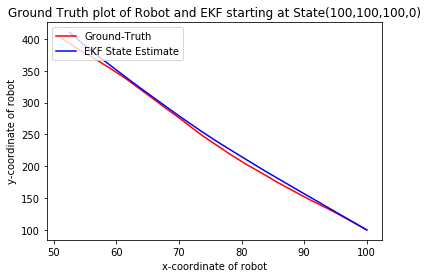

In [1276]:
my_State = State(100,100,100,0)
my_wheel_angular_velocity= wheel_angular_velocity(np.pi*2,np.pi*2)
dt =0.1
import matplotlib.pyplot as plt
#df = simulate_path(my_State, dt)
df_gtruth, df_ekf_truth, df_bar, df_hat, d1, d2, d3, d4 = simulate_path_noise_with_EKF(my_State,dt,range_std,angle_std,omega_std,my_wheel_angular_velocity,sim_time=2)
plt.plot(df_gtruth.x,df_gtruth.y, color = 'r', label="Ground-Truth")
plt.xlabel("x-coordinate of robot")
plt.ylabel("y-coordinate of robot")
plt.title("Ground Truth plot of Robot and EKF starting at State(100,100,100,0)")
#plt.plot(df_ekf_truth.x,df_ekf_truth.y, color = 'g')
#plt.plot(df_bar.x,df_bar.y, color = 'y')
plt.plot(df_hat.x, df_hat.y, color = 'b', label="EKF State Estimate")
plt.legend(loc="upper left")

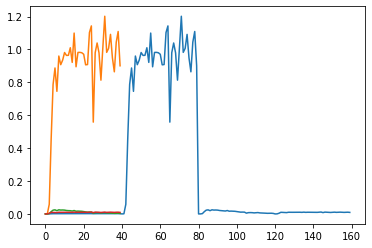

In [1270]:
|plt.plot(d1+d2+d3+d4)
plt.plot(d2)
plt.plot(d3)
plt.plot(d4)

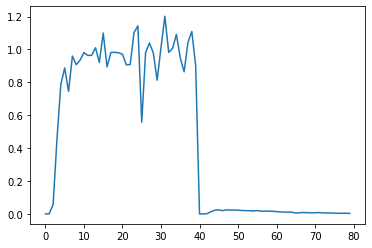

In [1271]:
plt.plot(d2+d3)
